# Ejercicio Aplicando PCA: Principal Component Analysis

Lee el articulo completo en www.aprendemachinelearning.com

### Importamos librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

### Cargamos datos de entrada

In [2]:
#dataframe = pd.read_csv(r"comprar_alquilar.csv")
dataframe = pd.read_excel(r"..\Datathon\e-commerce_arreglado.xlsx")
dataframe = dataframe.drop(['Unnamed: 0'], axis = 1)
dataframe.tail(10)
# REFERENCIAS:
# ingresos y gastos son mensuales de 1 personas o 2 si están casados.
# trabajo: 0-sin trabajo 1-autonomo 2-asalariado 3-empresario 4-Autonomos 5-Asalariados 6-Autonomo y Asalariado 7-Empresario y Autonomo 8 Empresarios o empresario y autónomo
# estado_civil: 0-soltero 1-casado 2-divorciado
# hijos: Cantidad de hijos menores (no trabajan)
# comprar: 0-mejor alquilar 1-Comprar casa
# hipoteca fija a 30 años con interes

,MOS_Road,MOS_Ship,WB_B,WB_C,WB_D,WB_F,Discount_offered,Weight_in_gms,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Reached.on.Time_Y.N
8989,0,1,0,0,0,1,1,4541,4,4,174,2,1,1
8990,0,1,0,0,0,0,10,5528,4,2,239,4,1,1
8991,0,1,1,0,0,0,9,4744,3,4,236,4,0,0
8992,0,1,0,1,0,0,9,5345,4,5,162,2,2,1
8993,0,1,0,0,0,1,8,5215,3,4,260,3,1,0
8994,0,1,0,0,1,0,1,4177,3,1,217,3,1,1
8995,0,1,0,0,0,1,3,4526,5,3,232,3,2,0
8996,0,1,0,0,0,0,6,4221,4,5,260,3,2,0
8997,0,1,1,0,0,0,5,5931,4,2,184,3,2,1
8998,0,1,0,1,0,0,4,4790,5,4,145,4,1,0


In [28]:
dataframe.shape

(8999, 14)

### Visualicemos las dimensiones

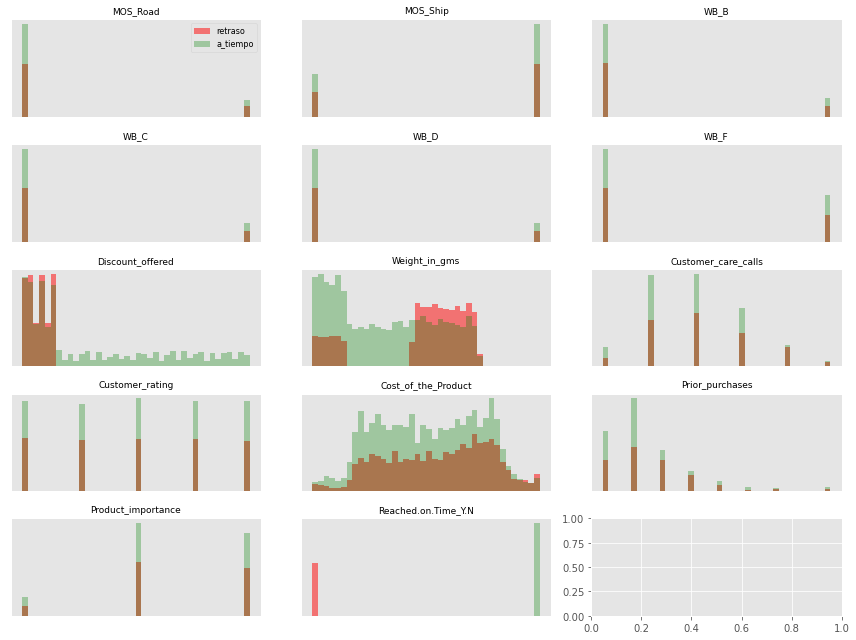

In [14]:
fig,axes =plt.subplots(5,3, figsize=(12, 9)) # 2 columnas cada una con 5 figuras, total 10 features
retraso=dataframe[dataframe['Reached.on.Time_Y.N']==0] # conviene alquilar casa
a_tiempo=dataframe[dataframe['Reached.on.Time_Y.N']==1] # conviene comprar casa
ax=axes.ravel()
for i in range(len(dataframe.columns)):
  _,bins=np.histogram(dataframe[dataframe.columns[i]],bins=40)
  ax[i].hist(retraso.values[:,i],bins=bins,color='r',alpha=.5)# rojo alquilar
  ax[i].hist(a_tiempo.values[:,i],bins=bins,color='g',alpha=0.3)# verde para comprar
  ax[i].set_title(dataframe.columns[i],fontsize=9)
  ax[i].axes.get_xaxis().set_visible(False)
  ax[i].set_yticks(())
ax[0].legend(['retraso','a_tiempo'],loc='best',fontsize=8)
plt.tight_layout()
plt.show()

### Ejemplo de como se correlacionan

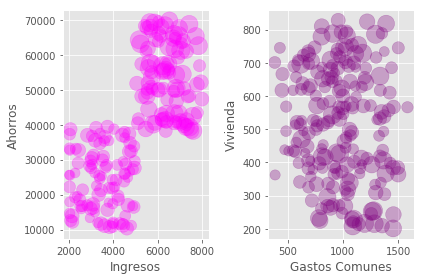

In [4]:
plt.subplot(1,2,1)#fisrt plot
plt.scatter(dataframe['ingresos'], dataframe['ahorros'], s=dataframe['vivienda']*0.0005, color='magenta', label='check', alpha=0.3)
plt.xlabel('Ingresos',fontsize=12)
plt.ylabel('Ahorros',fontsize=12)
plt.subplot(1,2,2)# 2nd plot
plt.scatter(dataframe['gastos_comunes'], dataframe['gastos_otros'], s=dataframe['vivienda']*0.0005, color='purple', label='check', alpha=0.3)
plt.xlabel('Gastos Comunes',fontsize=12)
plt.ylabel('Vivienda',fontsize=12)
plt.tight_layout()
plt.show()

## Vamos a Normalizar ó Estandalizar los datos

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler(feature_range=(0,1))#instantiate
#scaler=StandardScaler()#instantiate
df = dataframe.drop(['Reached.on.Time_Y.N'], axis=1)
scaler.fit(df) # calcula la media y estandar para cada dimension
X_scaled=scaler.transform(df)# transforma los datos a su nueva escala

## Aplicamos PCA

In [4]:
pca=PCA(n_components=13)
#pca=PCA(.85)
pca.fit(X_scaled) # buscar los componentes principales
X_pca=pca.transform(X_scaled) 
#revisemos la forma del array
print("shape of X_pca", X_pca.shape)

shape of X_pca (8999, 13)


### Veamos cuán buenos predictores son las nuevas dimensiones

In [5]:
Veamos cuán buenos predictores son las nuevas dimensiones
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:8]))
#con 8 componentes de 13  tenemos algo mas del 85% de varianza explicada

[0.19620638 0.18270279 0.11229829 0.11218501 0.08405329 0.06855646
 0.06309202 0.05171451 0.04003828 0.02611254 0.02287851 0.02227719
 0.01788472]
suma: 0.8708087584468469


### graficamos la variacion explicada acumulada

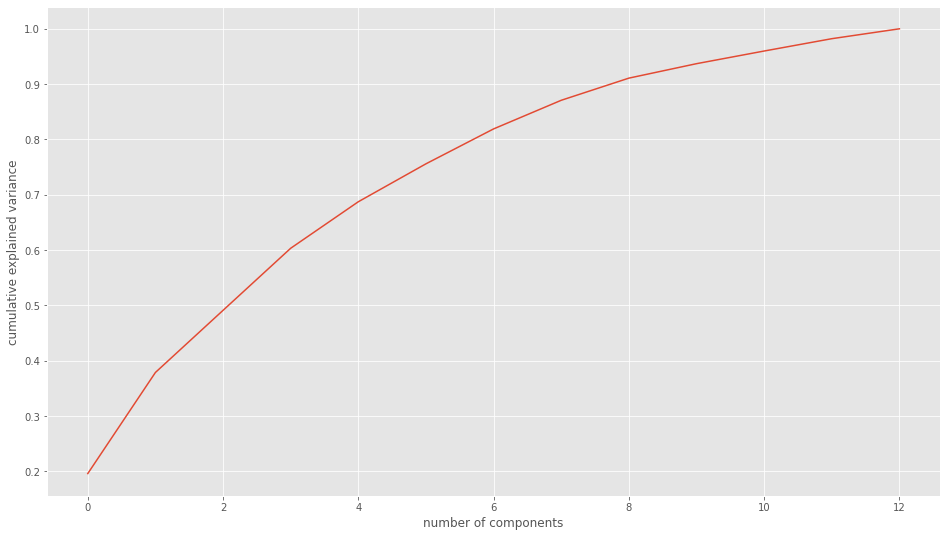

In [8]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

## Graficamos los 2 componentes principales

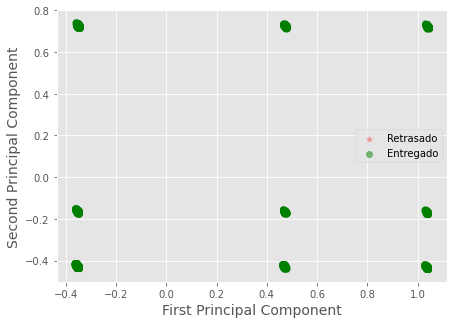

In [21]:
Xax=X_pca[:,0]
Yax=X_pca[:,1]
labels=dataframe['Reached.on.Time_Y.N'].values
#labels=[0,1] # Malignant, Beningn
cdict={0:'red',1:'green'}
labl={0:'Retrasado',1:'Entregado'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],label=labl[l],s=40,marker=marker[l],alpha=alpha[l])

plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()

# please check the scatter plot of the remaining component and you will see and understand the difference

### Veamos la correlacion entre las nuevas componentes y las dimensiones originales

C:\Users\Mariel\AppData\Local\Temp\ipykernel_7176\2351212695.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()
C:\Users\Mariel\AppData\Local\Temp\ipykernel_7176\2351212695.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


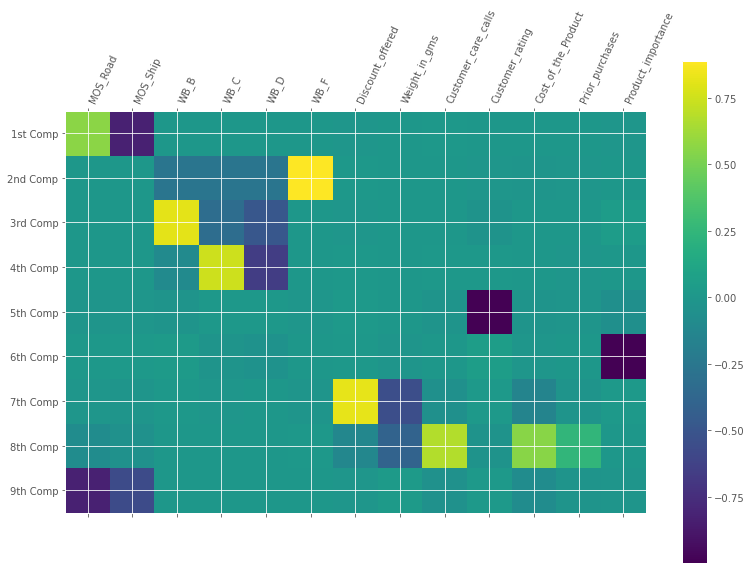

In [11]:
plt.matshow(pca.components_[0:9],cmap='viridis')
plt.yticks([0,1,2,3,4,5,6,7,8],['1st Comp','2nd Comp','3rd Comp','4th Comp','5th Comp','6th Comp','7th Comp','8th Comp','9th Comp'], fontsize=10)
plt.colorbar()
plt.xticks(range(len(df.columns)),df.columns,rotation=65,ha='left')
plt.tight_layout()
plt.show()# 

In [6]:
components = pd.DataFrame(pca.components_, columns = df.columns)
components

,MOS_Road,MOS_Ship,WB_B,WB_C,WB_D,WB_F,Discount_offered,Weight_in_gms,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance
0,0.564930,-0.825051,-0.001277,-0.001168,-0.000410,0.002806,-0.006754,0.000402,0.008024,-0.000998,0.000397,0.000058,-0.004822
1,-0.001659,0.002711,-0.262850,-0.262821,-0.263028,0.890117,0.011236,0.000412,0.003403,-0.002793,-0.011854,-0.004831,0.004865
2,0.000195,-0.000635,0.810066,-0.323919,-0.485653,-0.000166,-0.004384,0.001289,-0.001304,-0.027919,0.004769,-0.001522,0.046723
3,0.000593,-0.000227,-0.093373,0.749232,-0.655565,-0.000213,0.007731,-0.000775,0.005418,0.006756,-0.000387,-0.004096,0.003813
4,-0.010515,-0.006003,-0.022917,0.011482,0.005904,-0.004902,0.015760,-0.000663,-0.019995,-0.997430,-0.017916,-0.014963,-0.055473
5,0.010295,0.012761,0.032506,-0.019502,-0.031991,-0.000177,0.009909,-0.013147,0.004781,0.054196,-0.002785,0.001847,-0.997010
6,-0.002891,-0.009681,0.006452,-0.004518,0.004345,-0.010131,0.822180,-0.547370,-0.049122,0.016305,-0.143828,-0.022044,0.016408
7,-0.077723,-0.045527,-0.000906,0.000386,0.003040,0.008414,-0.120496,-0.396017,0.675843,-0.027807,0.551709,0.241924,0.003139
8,-0.820886,-0.562411,0.000425,-0.000473,-0.001369,-0.001029,-0.005707,0.030914,-0.043551,0.015340,-0.077819,-0.020656,-0.015268
9,0.023972,0.020553,-0.075118,-0.076861,-0.080686,-0.073278,-0.289155,-0.278594,0.231707,-0.002622,-0.741731,0.458737,0.006857


## Preparo nuevas entradas para validar el algoritmo

In [7]:
# Split dataset in training and test datasets
dfScaledPca = pd.DataFrame(X_pca, columns = df.columns)
dfScaledPca["Reached.on.Time_Y.N"]=dataframe["Reached.on.Time_Y.N"]
print (dfScaledPca.head())
print(dfScaledPca.shape)
X_train, X_test = train_test_split(dfScaledPca, test_size=0.2, random_state=4) #6 
y_train =X_train["Reached.on.Time_Y.N"]
y_test = X_test["Reached.on.Time_Y.N"]
X_train = X_train.drop(['Reached.on.Time_Y.N'], axis=1)
X_test = X_test.drop(['Reached.on.Time_Y.N'], axis=1)

   MOS_Road  MOS_Ship      WB_B      WB_C      WB_D      WB_F  \
0  0.468424 -0.422928 -0.489212 -0.653744  0.282654  0.124276   
1  0.469483  0.729311 -0.024283  0.008719 -0.474106  0.194757   
2  0.465346 -0.161366 -0.002965 -0.000628  0.283152  0.151014   
3  0.466881 -0.428217  0.825256 -0.093652 -0.029417 -0.302052   
4  0.461921 -0.421610 -0.303341  0.750879  0.268278 -0.365837   

   Discount_offered  Weight_in_gms  Customer_care_calls  Customer_rating  \
0          0.589002       0.032271             0.510745         0.008707   
1          0.607659      -0.048468             0.518030        -0.321640   
2          0.477696      -0.326795             0.534083        -0.071956   
3          0.178825      -0.017310             0.518010         0.187407   
4          0.528942      -0.297246             0.524353        -0.160937   

   Cost_of_the_Product  Prior_purchases  Product_importance  \
0            -0.107723        -0.077327            0.014065   
1             0.001864    

## Prediccion con Gaussian Naive Bayes

### Con datos de entrada con reducción de dimensiones por PCA

In [8]:
# Instantiate the classifier
gnb = GaussianNB()
# Train classifier
gnb.fit(
    X_train.values,
    y_train
)
y_pred = gnb.predict(X_test)

c:\Users\Mariel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


## Prediccion con REGRESION LOGISTICA

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

regr_log = LogisticRegression(solver = 'liblinear')

tol = [0.01, 0.001, 0.0001]
max_iter = [150, 200, 300, 1000]

param_grid = {'tol': tol, 
              'max_iter': max_iter,
              }

grid_model = GridSearchCV(regr_log, param_grid=param_grid, cv=5)

# Entrenamos
grid_model.fit(X_train.values,
    y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'max_iter': [150, 200, 300, 1000],
                         'tol': [0.01, 0.001, 0.0001]})

In [40]:
# Summarize results
best_score, best_params = grid_model.best_score_, grid_model.best_params_

# Creating a dictionary to save the best results
best_models = {'Logistic': best_score}


print(f'Mejor resultado: {best_score}, usando {best_params}')

Mejor resultado: 0.676897150799166, usando {'max_iter': 150, 'tol': 0.001}


In [39]:
y_pred = grid_model.predict(X_test)

c:\Users\Mariel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


## Resultados Obtenidos

In [9]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(gnb.score(X_train, y_train))) #batir  87
print('Precisión en el set de Test: {:.2f}'
     .format(gnb.score(X_test, y_test)))  #batir  90

Precisión en el set de Entrenamiento: 0.69
Precisión en el set de Test: 0.67


c:\Users\Mariel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
c:\Users\Mariel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [30]:
# Print Test results
print("Total de Muestras en Test: {}\nFallos: {}"
      .format(
          X_test.shape[0],
          (y_test != y_pred).sum()
))

Total de Muestras en Test: 1800
Fallos: 595


In [10]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[546  96]
 [499 659]]
              precision    recall  f1-score   support

           0       0.52      0.85      0.65       642
           1       0.87      0.57      0.69      1158

    accuracy                           0.67      1800
   macro avg       0.70      0.71      0.67      1800
weighted avg       0.75      0.67      0.67      1800



### Comprobamos con predicciones individuales

In [19]:
X_scaledTest=scaler.transform([[6830,1298,345,309,46761,429812,1,1,5], # 1
                               [4054,1095,371,440,22183,223971,1,0,3], # 0
                               [6455,1033,98,795,57463,321779,2,1,8], # 1
                               [6470,1035,39,782,57439,606291,0,0,1] #0
                    ])
X_pcaTest=pca.transform(X_scaledTest) 
#print(X_pcaTest)
print(gnb.predict(X_pcaTest))

[1 0 1 0]
